# 导入库

In [50]:
%pylab inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']

Populating the interactive namespace from numpy and matplotlib


# 导入csv文件

In [51]:
filename='/Users/wuchenyang/Downloads/P2_exam/titanic-data.csv'
titanic_df=pd.read_csv(filename)

In [52]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

从上面可以看出Age、Cabin、Embarked有缺失

# 修正数据类型

In [53]:
#去除年龄为空的记录
#由于Embarked仅2条记录为空，空值替换成C
#Cabin由于缺少的记录多，变换成有值则为Yes，无记录则为No
titanic_df=titanic_df.dropna(subset=['Age'],inplace=False)
titanic_df['Embarked']=titanic_df['Embarked'].fillna('C')
titanic_df['Cabin']=titanic_df['Cabin'].isnull().map({True:'No',False:'Yes'})

#增加年龄区间
bins=[0,10,18,60,80]
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'],bins)

In [54]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          714 non-null object
Embarked       714 non-null object
Age_Group      714 non-null category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 73.3+ KB


In [55]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S,"(18, 60]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C,"(18, 60]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S,"(18, 60]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S,"(18, 60]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S,"(18, 60]"


# 性别和是否获救的关系，从中可以看出，女性优先，获救的比例较大

性别与是否获救的乘客总量

In [56]:
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     64
          male      360
1         female    197
          male       93
Name: Survived, dtype: int64

是否获救的乘客数量图表

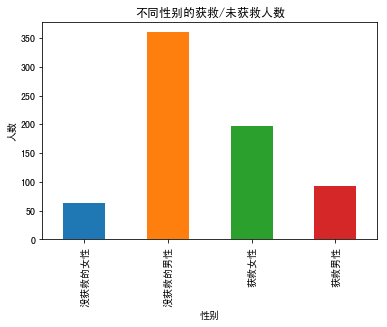

In [57]:
bar=titanic_df.groupby(['Survived','Sex'])['Survived'].count()
bar.plot(kind='bar')
plt.xlabel(U'性别')
plt.ylabel(U'人数')
plt.title(U"不同性别的获救/未获救人数")
plt.xticks((0,1,2,3),(u"没获救的女性",u"没获救的男性",u"获救女性",u"获救男性")) 
plt.show()

性别与获救比例

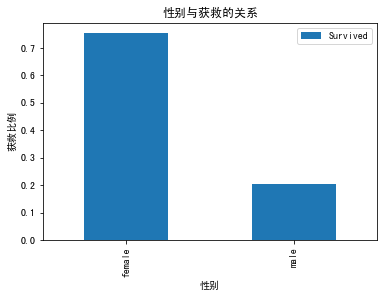

In [60]:
bar=titanic_df[['Survived','Sex']].groupby('Sex').mean()
bar.plot(kind='bar')
plt.xlabel(U'性别')
plt.ylabel(U'获救比例')
plt.title(U"性别与获救的关系")
plt.show()

# 判断年龄区间，从中可以看出，年龄越小获救可能性越大

In [61]:
titanic_df.groupby('Age_Group')['Survived'].count()

Age_Group
(0, 10]      64
(10, 18]     75
(18, 60]    553
(60, 80]     22
Name: Survived, dtype: int64

乘客年龄区间分布图

Text(0.5,1,u'\u6cf0\u5766\u5c3c\u514b\u53f7\u4e58\u5ba2\u7684\u5e74\u9f84\u5206\u5e03')

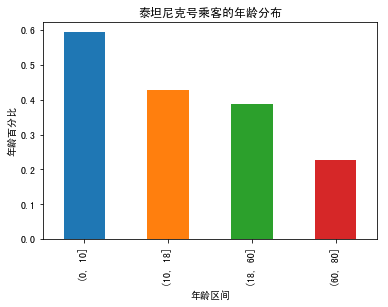

In [62]:
from matplotlib.font_manager import _rebuild
bar=titanic_df.groupby('Age_Group')['Survived'].mean()
bar.plot(kind='bar')
plt.xlabel(U'年龄区间')
plt.ylabel(U'年龄百分比')
plt.title(U'泰坦尼克号乘客的年龄分布')

In [63]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

获救人数与非获救人数，年龄所占比例

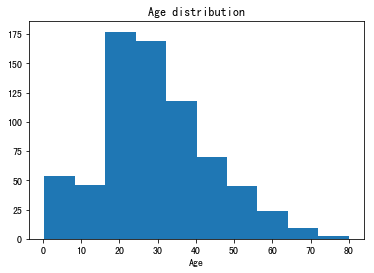

In [73]:

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(titanic_df['Age'], bins=10)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()

Text(0.5,1,u'\u5e74\u9f84\u548c\u83b7\u6551\u6bd4\u4f8b\u7684\u5173\u7cfb')

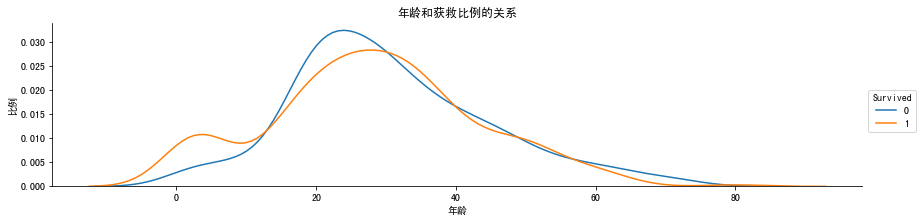

In [70]:
sns.FacetGrid(data=titanic_df,hue='Survived',aspect =4).map(sns.kdeplot,'Age').add_legend()
plt.xlabel(U'年龄')
plt.ylabel(U'比例')
plt.title(U'年龄和获救比例的关系')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(df['Age'], bins=7)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Employee')
plt.show()

# 票面级别是否占有一定作用，性别相同的情况下，是否Pclass高的会优先，从中可以看出，座位等级越高，占据一定优势


Text(0.5,1,u'\u7968\u9762\u7ea7\u522b\u548c\u83b7\u6551\u7684\u5173\u7cfb')

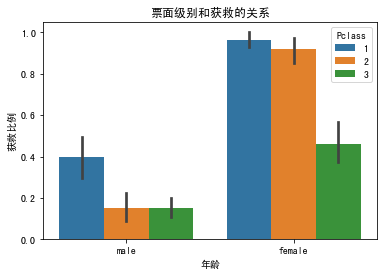

In [66]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=titanic_df)
plt.xlabel(U'年龄')
plt.ylabel(U'获救比例')
plt.title(U'票面级别和获救的关系')

# 结论

由于此文件只给出了891名乘客的信息，如果891个信息是从所有乘客中随机抽取出来的，则以上分析有代表性，
如果不是随机抽取，以上结论不一定正确。